#Y2.S1.WE.IT.03.02
#Group 344:
Integrated preprocessing pipeline (Part I: Data Cleaning, Preprocessing & EDA)

Order:
1) Missing Data
2) Categorical Encoding
3) Outlier Detection & Removal
4) Feature Engineering – Blood Pressure/Cholesterol (PLACEHOLDER)
5) Feature Engineering – Symptoms
6) Normalization / Scaling

In [220]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline
sns.set(color_codes=True)

In [221]:
#Loading the dataset
#RAW_DATA_PATH = "data/raw/stroke_prediction_dataset.csv"
df = pd.read_csv('/stroke_prediction_dataset.csv')  #Change file path as required (according to where it was saved)

In [222]:
#Displaying first five rows
df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [223]:
#Displaying summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [224]:
id_cols = ["Patient ID","Patient Name"]
target_col = "Diagnosis"
numeric_cols = ["Age", "Average Glucose Level","Body Mass Index (BMI)","Stress Levels"] #Engineered columns added later
categorical_cols = ["Gender","Marital Status","Work Type","Smoking Status","Alcohol Intake","Physical Activity","Family History of Stroke","Dietary Habits"]

In [225]:
#Handling Missing Data (by IT24102506 - Arif. R)
#1. Dropping irrelevant columns
df.drop(id_cols, axis=1, inplace=True)

In [226]:
#Dimension of dataframe after dropping id columns
df.shape

(15000, 20)

In [227]:
#2. Finding missing values
print(df.isnull().sum())

Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64


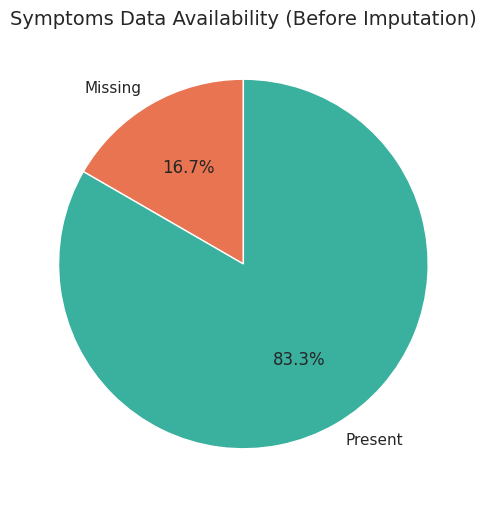

In [228]:
#3. EDA Visualization: Symptoms availability before imputation
missing_symptoms = df["Symptoms"].isnull().sum()
present_symptoms = df["Symptoms"].notnull().sum()

plt.figure(figsize=(6,6))
plt.pie(
    [missing_symptoms, present_symptoms],
    labels=["Missing", "Present"],
    autopct='%1.1f%%',
    startangle=90,
    colors=["#E97451","#3AB09E"]
)
plt.title("Symptoms Data Availability (Before Imputation)", fontsize=14)
plt.show()

In [229]:
#4. Handling missing values for "Symptoms" column
#Filling in missing values as "Unknown"
df.fillna({"Symptoms":"Unknown"}, inplace = True)

In [230]:
#5. Dataframe after handling missing values:
print(df.isnull().sum())

#Visualizing top 12 rows after change
df.head(12)

Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Marital Status              0
Work Type                   0
Residence Type              0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               0
Blood Pressure Levels       0
Cholesterol Levels          0
Symptoms                    0
Diagnosis                   0
dtype: int64


,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
5,62,Female,0,0,Single,Private,Urban,91.60,37.47,Currently Smokes,Social Drinker,High,0,No,Gluten-Free,4.85,132/64,"HDL: 80, LDL: 69",Severe Fatigue,Stroke
6,40,Female,1,0,Married,Private,Urban,77.83,28.20,Currently Smokes,Never,Low,1,No,Vegetarian,6.38,178/105,"HDL: 31, LDL: 134",Unknown,No Stroke
7,61,Female,0,1,Divorced,Government Job,Rural,194.73,26.44,Formerly Smoked,Rarely,Moderate,1,No,Vegan,5.85,179/72,"HDL: 66, LDL: 134",Loss of Balance,Stroke
8,72,Female,1,1,Married,Self-employed,Rural,72.99,30.10,Formerly Smoked,Rarely,High,1,No,Vegetarian,0.73,141/106,"HDL: 71, LDL: 140","Loss of Balance, Dizziness, Difficulty Speaking",Stroke
9,82,Male,0,0,Divorced,Self-employed,Urban,111.23,28.83,Currently Smokes,Rarely,High,1,Yes,Non-Vegetarian,8.39,119/88,"HDL: 32, LDL: 88",Unknown,No Stroke


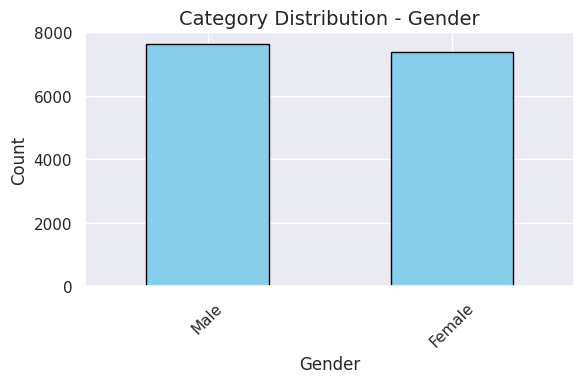

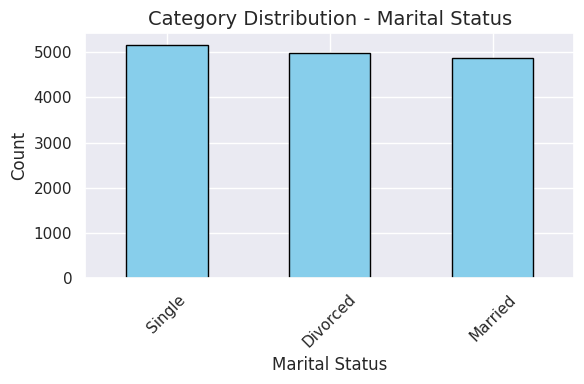

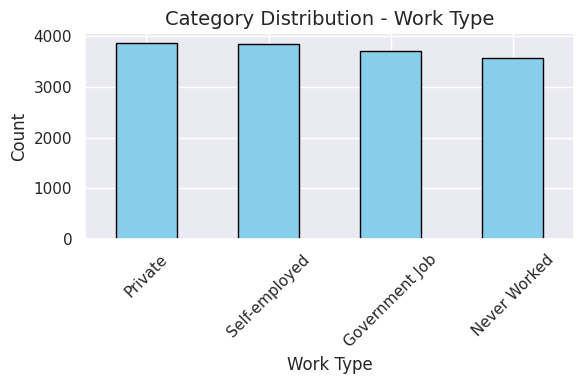

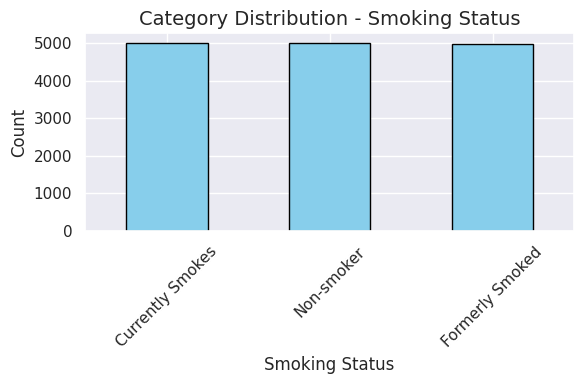

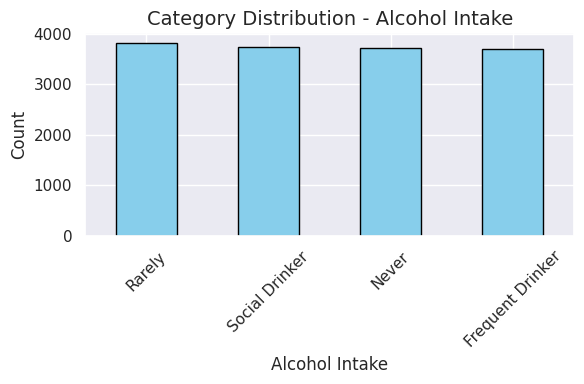

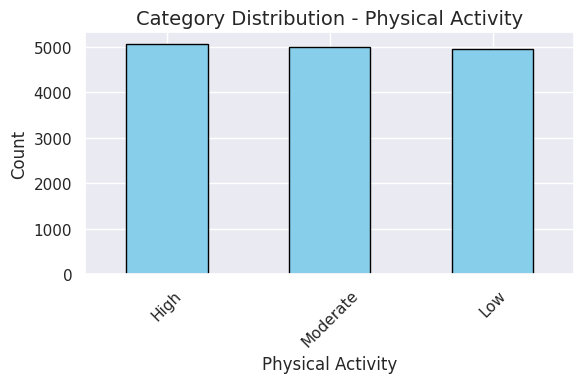

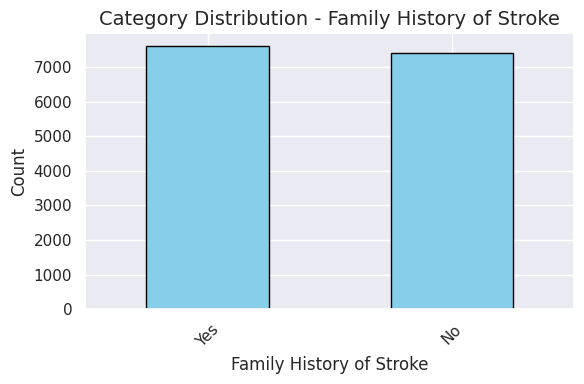

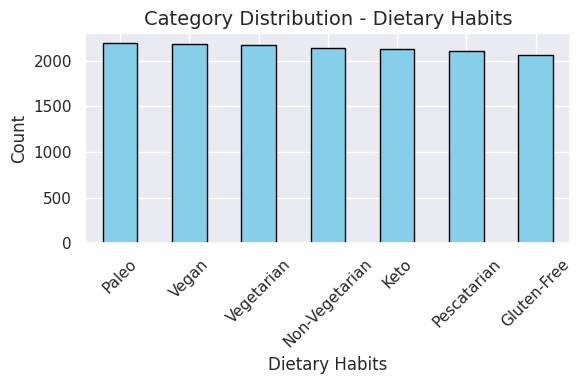

In [232]:
#Encode Categorical Features (by IT24103891 - Perera J.M.C.S.)
#1. EDA visualization: Category distribution BEFORE encoding
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Category Distribution - {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [233]:
#2. Binary Encoding
binary_cols = {"Gender": {"Male": 0, "Female": 1},"Family History of Stroke": {"No": 0, "Yes": 1}, "Diagnosis": {"No Stroke": 0, "Stroke": 1}}
df.replace(binary_cols, inplace=True)

df.head()

/tmp/ipython-input-2018884307.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(binary_cols, inplace=True)


,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,56,0,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,Social Drinker,Moderate,0,1,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",1
1,80,0,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,Never,Low,0,0,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",1
2,26,0,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,Rarely,High,0,1,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",1
3,73,0,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,0,0,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",0
4,51,0,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,Rarely,Low,0,1,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,1


In [234]:
#3. One-Hot Encoding for multi-class nominal columns
multi_class_cols = ["Work Type", "Residence Type", "Smoking Status","Alcohol Intake", "Physical Activity", "Dietary Habits", "Marital Status"]
df_encoded = pd.get_dummies(df, columns=multi_class_cols, drop_first=False)

In [235]:
#4. Converting boolean dummies to int (else it will be in True/False format)
for col in df_encoded.select_dtypes(include="bool").columns:
    df_encoded[col] = df_encoded[col].astype(int)

In [236]:
#Checking new structure
print(df_encoded.shape)

(15000, 39)


In [237]:
#5. Validating change
df_encoded.head()

,Age,Gender,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Family History of Stroke,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis,Work Type_Government Job,Work Type_Never Worked,Work Type_Private,Work Type_Self-employed,Residence Type_Rural,Residence Type_Urban,Smoking Status_Currently Smokes,Smoking Status_Formerly Smoked,Smoking Status_Non-smoker,Alcohol Intake_Frequent Drinker,Alcohol Intake_Never,Alcohol Intake_Rarely,Alcohol Intake_Social Drinker,Physical Activity_High,Physical Activity_Low,Physical Activity_Moderate,Dietary Habits_Gluten-Free,Dietary Habits_Keto,Dietary Habits_Non-Vegetarian,Dietary Habits_Paleo,Dietary Habits_Pescatarian,Dietary Habits_Vegan,Dietary Habits_Vegetarian,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,56,0,0,1,130.91,22.37,0,1,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
1,80,0,0,0,183.73,32.57,0,0,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,26,0,1,1,189.00,20.32,0,1,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,73,0,0,0,185.29,27.50,0,0,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,51,0,1,1,177.34,29.06,0,1,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [238]:
df = df_encoded.copy()

In [239]:
#Outlier Detection & Removal (by IT24103969 - Kothalawala K.P.)
#1. Calculating Q1, Q2, Q3 and IQR for numeric data
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

#2. Filter rows that are NOT outliers
#Keep rows that are within IQR bounds
condition =~((df[numeric_cols]<(Q1-1.5*IQR)) | (df[numeric_cols]>(Q3+1.5*IQR))).any(axis=1)

#3. Applying condition to dataset
df_cleaned = df[condition]

In [240]:
df = df_cleaned.copy()

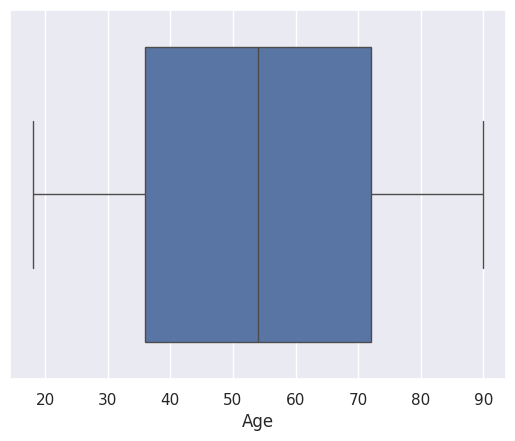

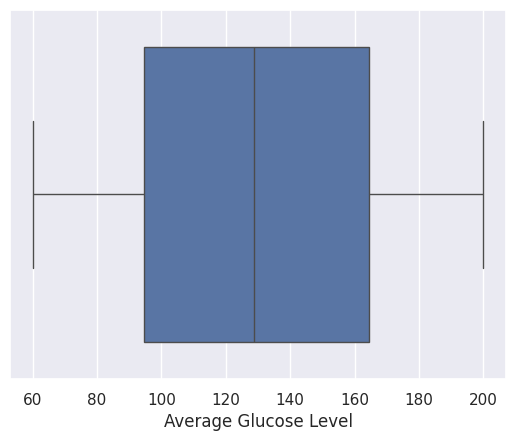

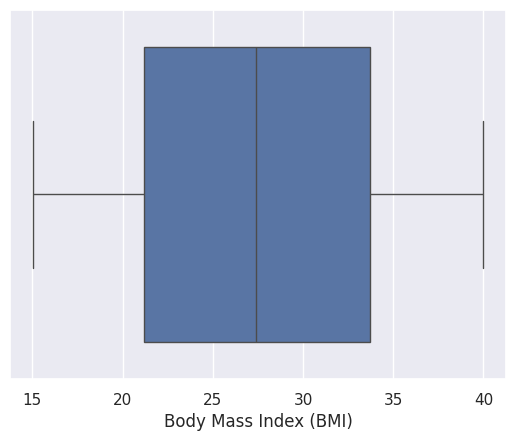

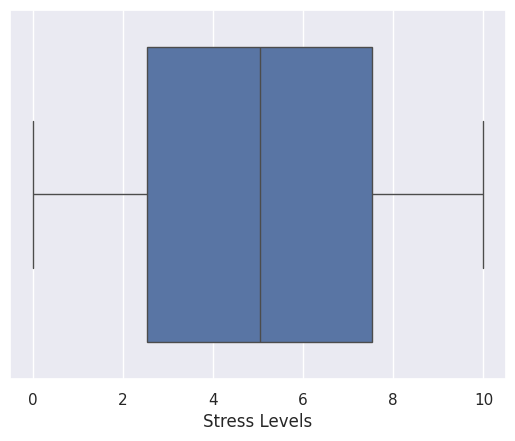

In [241]:
#4. Showing outliers graphically (Age, Average Glucose Level, Body Mass Index, Stress Levels)
sns.boxplot(x=df['Age'])
plt.show()

sns.boxplot(x=df['Average Glucose Level'])
plt.show()

sns.boxplot(x=df['Body Mass Index (BMI)'])
plt.show()

sns.boxplot(x=df['Stress Levels'])
plt.show()

In [242]:
#Feature Engineering – Blood Pressure & Cholesterol (by IT24610813 - Darmasena O.K.M.S.)
#1. Split Blood Pressure
df[["Systolic_BP", "Diastolic_BP"]] = df["Blood Pressure Levels"].str.split("/", expand=True)

df["Systolic_BP"] = pd.to_numeric(df["Systolic_BP"], errors="coerce")
df["Diastolic_BP"] = pd.to_numeric(df["Diastolic_BP"], errors="coerce")
df.drop(columns=["Blood Pressure Levels"], inplace=True)

df.head()

,Age,Gender,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Family History of Stroke,Stress Levels,Cholesterol Levels,Symptoms,Diagnosis,Work Type_Government Job,Work Type_Never Worked,Work Type_Private,Work Type_Self-employed,Residence Type_Rural,Residence Type_Urban,Smoking Status_Currently Smokes,Smoking Status_Formerly Smoked,Smoking Status_Non-smoker,Alcohol Intake_Frequent Drinker,Alcohol Intake_Never,Alcohol Intake_Rarely,Alcohol Intake_Social Drinker,Physical Activity_High,Physical Activity_Low,Physical Activity_Moderate,Dietary Habits_Gluten-Free,Dietary Habits_Keto,Dietary Habits_Non-Vegetarian,Dietary Habits_Paleo,Dietary Habits_Pescatarian,Dietary Habits_Vegan,Dietary Habits_Vegetarian,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Systolic_BP,Diastolic_BP
0,56,0,0,1,130.91,22.37,0,1,3.48,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,140,108
1,80,0,0,0,183.73,32.57,0,0,1.73,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,146,91
2,26,0,1,1,189.00,20.32,0,1,7.31,"HDL: 59, LDL: 95","Seizures, Dizziness",1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,154,97
3,73,0,0,0,185.29,27.50,0,0,5.35,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,174,81
4,51,0,1,1,177.34,29.06,0,1,6.84,"HDL: 65, LDL: 68",Difficulty Speaking,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,121,95


In [243]:
#Adding engineered features to numeric column list
numeric_cols = list(set(numeric_cols + ["Systolic_BP","Diastolic_BP"]))

In [244]:
#2. Extracting HDL & LDL
df["HDL"] = pd.to_numeric(df["Cholesterol Levels"].str.extract(r"HDL:\s*(\d+)")[0], errors="coerce")
df["LDL"] = pd.to_numeric(df["Cholesterol Levels"].str.extract(r"LDL:\s*(\d+)")[0], errors="coerce")
df.drop(columns=["Cholesterol Levels"], inplace=True)

df.head()

,Age,Gender,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Family History of Stroke,Stress Levels,Symptoms,Diagnosis,Work Type_Government Job,Work Type_Never Worked,Work Type_Private,Work Type_Self-employed,Residence Type_Rural,Residence Type_Urban,Smoking Status_Currently Smokes,Smoking Status_Formerly Smoked,Smoking Status_Non-smoker,Alcohol Intake_Frequent Drinker,Alcohol Intake_Never,Alcohol Intake_Rarely,Alcohol Intake_Social Drinker,Physical Activity_High,Physical Activity_Low,Physical Activity_Moderate,Dietary Habits_Gluten-Free,Dietary Habits_Keto,Dietary Habits_Non-Vegetarian,Dietary Habits_Paleo,Dietary Habits_Pescatarian,Dietary Habits_Vegan,Dietary Habits_Vegetarian,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Systolic_BP,Diastolic_BP,HDL,LDL
0,56,0,0,1,130.91,22.37,0,1,3.48,"Difficulty Speaking, Headache",1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,140,108,68,133
1,80,0,0,0,183.73,32.57,0,0,1.73,"Loss of Balance, Headache, Dizziness, Confusion",1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,146,91,63,70
2,26,0,1,1,189.00,20.32,0,1,7.31,"Seizures, Dizziness",1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,154,97,59,95
3,73,0,0,0,185.29,27.50,0,0,5.35,"Seizures, Blurred Vision, Severe Fatigue, Head...",0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,174,81,70,137
4,51,0,1,1,177.34,29.06,0,1,6.84,Difficulty Speaking,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,121,95,65,68


In [245]:
#Adding engineered features to numeric column list
numeric_cols = list(set(numeric_cols + ["HDL","LDL"]))

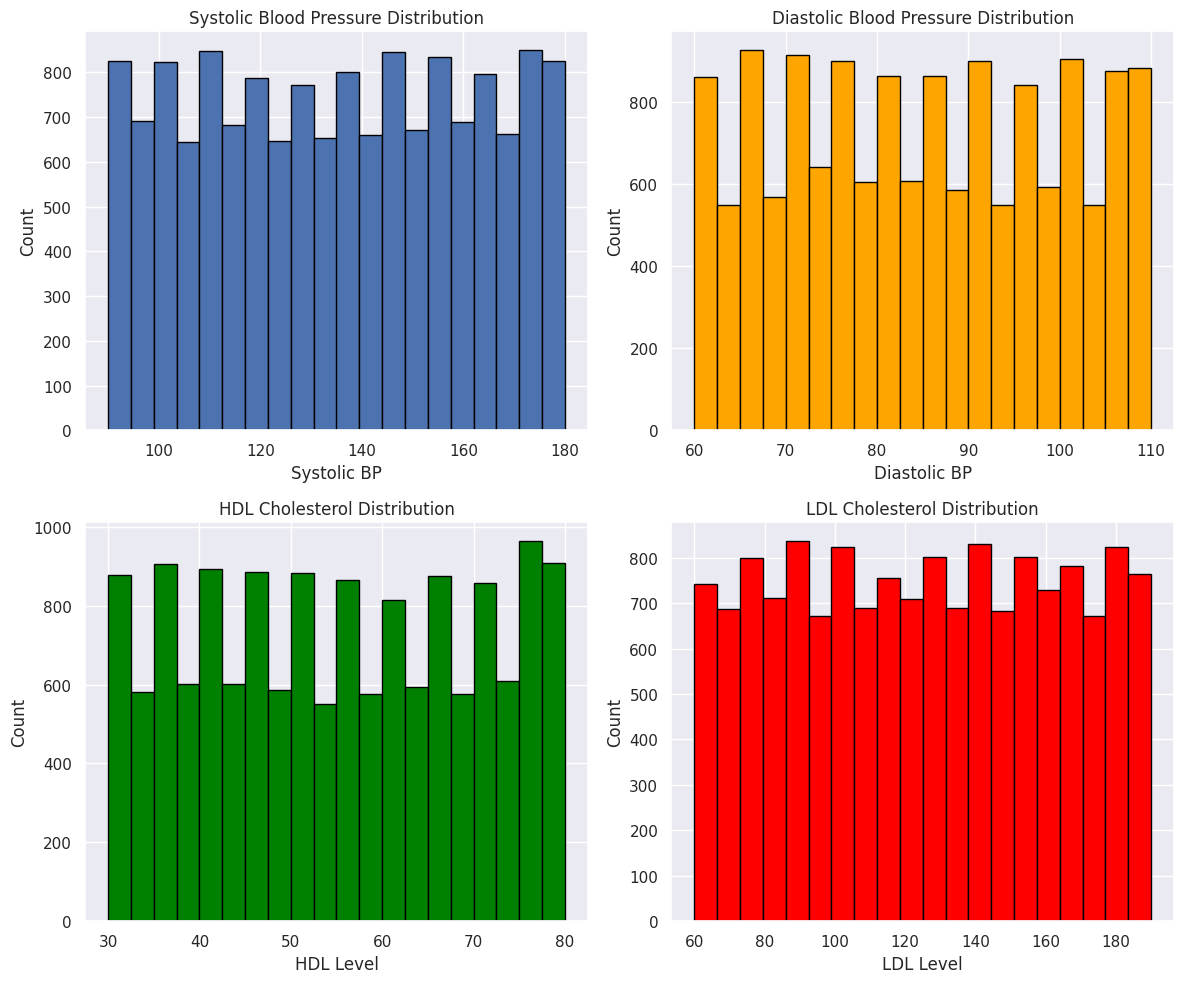

In [246]:
#3. EDA Visualizations: Engineered feature distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Systolic BP distribution
axes[0,0].hist(df["Systolic_BP"].dropna(), bins=20, edgecolor="black")
axes[0,0].set_title("Systolic Blood Pressure Distribution")
axes[0,0].set_xlabel("Systolic BP")
axes[0,0].set_ylabel("Count")

# Diastolic BP distribution
axes[0,1].hist(df["Diastolic_BP"].dropna(), bins=20, edgecolor="black", color="orange")
axes[0,1].set_title("Diastolic Blood Pressure Distribution")
axes[0,1].set_xlabel("Diastolic BP")
axes[0,1].set_ylabel("Count")

# HDL distribution
axes[1,0].hist(df["HDL"].dropna(), bins=20, edgecolor="black", color="green")
axes[1,0].set_title("HDL Cholesterol Distribution")
axes[1,0].set_xlabel("HDL Level")
axes[1,0].set_ylabel("Count")

# LDL distribution
axes[1,1].hist(df["LDL"].dropna(), bins=20, edgecolor="black", color="red")
axes[1,1].set_title("LDL Cholesterol Distribution")
axes[1,1].set_xlabel("LDL Level")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [247]:
#Feature Engineering – Symptoms (by IT24103862 - Dias A.A.L.)
#1. Split Symptoms into List
df["Symptoms_List"] = df["Symptoms"].apply(lambda x: [s.strip() for s in x.split(",")])

#2. Multi-label Binarization
mlb = MultiLabelBinarizer()
symptom_features = mlb.fit_transform(df["Symptoms_List"])

#3. Create a new DataFrame with symptom columns
symptom_df = pd.DataFrame(symptom_features, columns=mlb.classes_)

#4. Merge Back with Dataset
df = pd.concat([df, symptom_df], axis=1)

In [248]:
#5. Dropping original and temporarily created columns
df.drop(columns=["Symptoms_List"], inplace=True)
df.drop(columns=["Symptoms"], inplace=True)
df.head()

,Age,Gender,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Family History of Stroke,Stress Levels,Diagnosis,Work Type_Government Job,Work Type_Never Worked,Work Type_Private,Work Type_Self-employed,Residence Type_Rural,Residence Type_Urban,Smoking Status_Currently Smokes,Smoking Status_Formerly Smoked,Smoking Status_Non-smoker,Alcohol Intake_Frequent Drinker,Alcohol Intake_Never,Alcohol Intake_Rarely,Alcohol Intake_Social Drinker,Physical Activity_High,Physical Activity_Low,Physical Activity_Moderate,Dietary Habits_Gluten-Free,Dietary Habits_Keto,Dietary Habits_Non-Vegetarian,Dietary Habits_Paleo,Dietary Habits_Pescatarian,Dietary Habits_Vegan,Dietary Habits_Vegetarian,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Systolic_BP,Diastolic_BP,HDL,LDL,Blurred Vision,Confusion,Difficulty Speaking,Dizziness,Headache,Loss of Balance,Numbness,Seizures,Severe Fatigue,Unknown,Weakness
0,56,0,0,1,130.91,22.37,0,1,3.48,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,140,108,68,133,0,0,1,0,1,0,0,0,0,0,0
1,80,0,0,0,183.73,32.57,0,0,1.73,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,146,91,63,70,0,1,0,1,1,1,0,0,0,0,0
2,26,0,1,1,189.00,20.32,0,1,7.31,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,154,97,59,95,0,0,0,1,0,0,0,1,0,0,0
3,73,0,0,0,185.29,27.50,0,0,5.35,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,174,81,70,137,1,1,0,0,1,0,0,1,1,0,0
4,51,0,1,1,177.34,29.06,0,1,6.84,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,121,95,65,68,0,0,1,0,0,0,0,0,0,0,0


<Axes: title={'center': 'Symptom Frequencies'}>

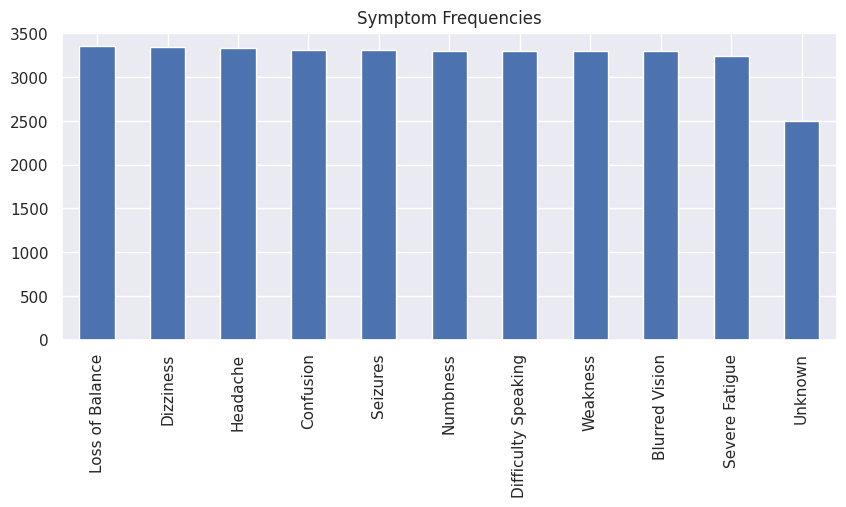

In [250]:
#6. EDA Visualizations: Engineered feature frequency
symptom_counts = symptom_df.sum().sort_values(ascending=False)
symptom_counts.plot(kind='bar', figsize=(10,4), title="Symptom Frequencies")

In [251]:
#Normalization / Scaling (by IT24103138 - Kavindi R.D.K.)
#1. Scaling numeric features using MinMaxScaler
scaler = MinMaxScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [252]:
#2. Displaying scaled numeric features
df[numeric_cols].describe()

,Diastolic_BP,Stress Levels,Systolic_BP,Age,Average Glucose Level,HDL,LDL,Body Mass Index (BMI)
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.497953,0.502269,0.500539,0.500495,0.496037,0.501299,0.500417,0.498772
std,0.293677,0.287322,0.292971,0.292543,0.289199,0.296908,0.289179,0.289324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,0.254000,0.244444,0.250000,0.246554,0.240000,0.246154,0.246098
50%,0.500000,0.505000,0.500000,0.500000,0.492143,0.500000,0.500000,0.496599
75%,0.760000,0.752000,0.755556,0.750000,0.747089,0.760000,0.753846,0.748699
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


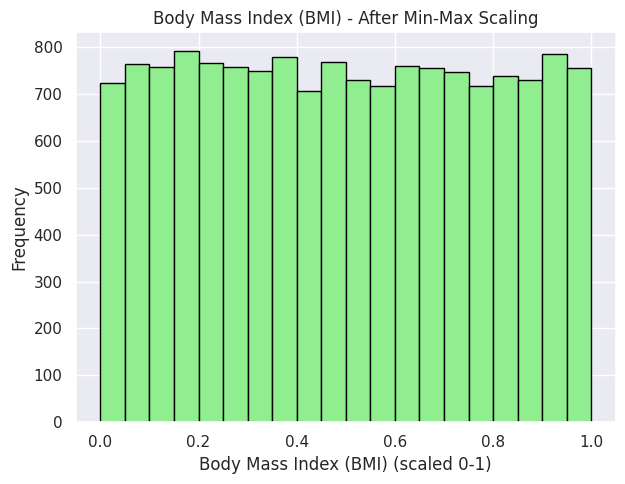

In [258]:
#3. Plotting histogram after scaling
col = "Body Mass Index (BMI)"

plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.hist(df[col], bins=20, color="lightgreen", edgecolor="black")
plt.title(f"{col} - After Min-Max Scaling")
plt.xlabel(f"{col} (scaled 0-1)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [180]:
#Saving Final Dataset
from google.colab import files
df.to_csv('processed_stroke_dataset.csv', index=False)
files.download('processed_stroke_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>